In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [93]:
df = pd.read_csv('ratio_station_starthour_onlyweekday.csv')

In [94]:
df

,start_station_id,starthour,gender ratio
0,72.0,0,15.333333
1,72.0,1,3.750000
2,72.0,2,2.111111
3,72.0,3,0.714286
4,72.0,4,9.500000
5,72.0,5,6.000000
6,72.0,6,3.806452
7,72.0,7,3.701754
8,72.0,8,2.913621
9,72.0,9,3.346341


In [95]:
key = pd.read_csv('nyc_bikeshare_key.csv')
key.set_index('station_id')

,station_name,station_latitude,station_longitude
station_id,,,
72,W 52 St & 11 Ave,40.767272,-73.993929
79,Franklin St & W Broadway,40.719116,-74.006667
82,St James Pl & Pearl St,40.711174,-74.000165
83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
116,W 17 St & 8 Ave,40.741776,-74.001497
119,Park Ave & St Edwards St,40.696089,-73.978034
120,Lexington Ave & Classon Ave,40.686768,-73.959282
127,Barrow St & Hudson St,40.731724,-74.006744
128,MacDougal St & Prince St,40.727103,-74.002971


In [96]:
df['start_lat'] = ""
df['start_long'] = ""
df['end_lat'] = ""
df['end_long'] = ""
for index, row in df.iterrows():
    if(row['start_station_id'] in key.index):
        df.loc[index, 'start_lat'] = key.loc[row['start_station_id'], 'station_latitude']
        df.loc[index, 'start_long'] = key.loc[row['start_station_id'], 'station_longitude']
        print('done')

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [97]:
df = df[(df['start_lat'] != '') & (df['start_long'] != '')
       & (df['start_lat'] != 0) & (df['start_long'] != 0)]

In [98]:
df['gender ratio'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1    1.878312
0.2    2.278553
0.3    2.622810
0.4    2.935567
0.5    3.250000
0.6    3.660910
0.7    4.189610
0.8    5.076250
0.9    7.050595
Name: gender ratio, dtype: float64

In [99]:
df1 = df[df['gender ratio'] < 1.878312]

In [100]:
df2 = df[(df['gender ratio'] >= 1.878312) & (df['gender ratio'] < 2.278553)]

In [101]:
df3 = df[(df['gender ratio'] >= 2.278553) & (df['gender ratio'] < 2.622810)]

In [102]:
df4 = df[(df['gender ratio'] >= 2.622810) & (df['gender ratio'] < 2.935567)]

In [103]:
df5 = df[(df['gender ratio'] >= 2.935567) & (df['gender ratio'] < 3.250000)]

In [104]:
df6 = df[(df['gender ratio'] >= 3.250000) & (df['gender ratio'] < 3.660910)]

In [105]:
df7 = df[(df['gender ratio'] >= 3.660910) & (df['gender ratio'] < 4.189610)]

In [106]:
df8 = df[(df['gender ratio'] >= 4.189610) & (df['gender ratio'] < 5.076250)]

In [107]:
df9 = df[(df['gender ratio'] >= 5.076250) & (df['gender ratio'] < 7.050595)]

In [108]:
df10 = df[(df['gender ratio'] >= 7.050595)]

In [109]:
geometry1 = [Point(xy) for xy in zip(df1['start_long'], df1['start_lat'])]
geometry2 = [Point(xy) for xy in zip(df2['start_long'], df2['start_lat'])]
geometry3 = [Point(xy) for xy in zip(df3['start_long'], df3['start_lat'])]
geometry4 = [Point(xy) for xy in zip(df4['start_long'], df4['start_lat'])]
geometry5 = [Point(xy) for xy in zip(df5['start_long'], df5['start_lat'])]
geometry6 = [Point(xy) for xy in zip(df6['start_long'], df6['start_lat'])]
geometry7 = [Point(xy) for xy in zip(df7['start_long'], df7['start_lat'])]
geometry8 = [Point(xy) for xy in zip(df8['start_long'], df8['start_lat'])]
geometry9 = [Point(xy) for xy in zip(df9['start_long'], df9['start_lat'])]
geometry10 = [Point(xy) for xy in zip(df10['start_long'], df10['start_lat'])]


In [110]:
crs = {'init':'epsg:4326'}
geo_df1 = gpd.GeoDataFrame(df1, crs = crs, geometry = geometry1)
geo_df2 = gpd.GeoDataFrame(df2, crs = crs, geometry = geometry2)
geo_df3 = gpd.GeoDataFrame(df3, crs = crs, geometry = geometry3)
geo_df4 = gpd.GeoDataFrame(df4, crs = crs, geometry = geometry4)
geo_df5 = gpd.GeoDataFrame(df5, crs = crs, geometry = geometry5)
geo_df6 = gpd.GeoDataFrame(df6, crs = crs, geometry = geometry6)
geo_df7 = gpd.GeoDataFrame(df7, crs = crs, geometry = geometry7)
geo_df8 = gpd.GeoDataFrame(df8, crs = crs, geometry = geometry8)
geo_df9 = gpd.GeoDataFrame(df9, crs = crs, geometry = geometry9)
geo_df10 = gpd.GeoDataFrame(df10, crs = crs, geometry = geometry10)

/anaconda3/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [111]:
df3

,start_station_id,starthour,gender ratio,start_lat,start_long,end_lat,end_long,geometry
10,72.0,10,2.315315,40.7175,-74.0105,,,POINT (-74.01046 40.71749)
11,72.0,11,2.614583,40.7175,-74.0105,,,POINT (-74.01046 40.71749)
43,79.0,19,2.380000,40.7345,-73.9907,,,POINT (-73.99074 40.73455)
55,82.0,9,2.333333,40.7131,-73.9848,,,POINT (-73.98484 40.71313)
59,82.0,13,2.595238,40.7131,-73.9848,,,POINT (-73.98484 40.71313)
103,116.0,9,2.328413,40.7153,-74.0166,,,POINT (-74.01658 40.71534)
131,119.0,13,2.500000,40.7145,-74.0056,,,POINT (-74.00563 40.71450)
142,120.0,0,2.500000,40.7117,-73.9919,,,POINT (-73.99193 40.71173)
151,120.0,9,2.580000,40.7117,-73.9919,,,POINT (-73.99193 40.71173)
171,127.0,5,2.611111,40.7127,-73.9878,,,POINT (-73.98776 40.71269)


In [112]:
street_mapr = gpd.read_file('nyu_2451_34499.shx')

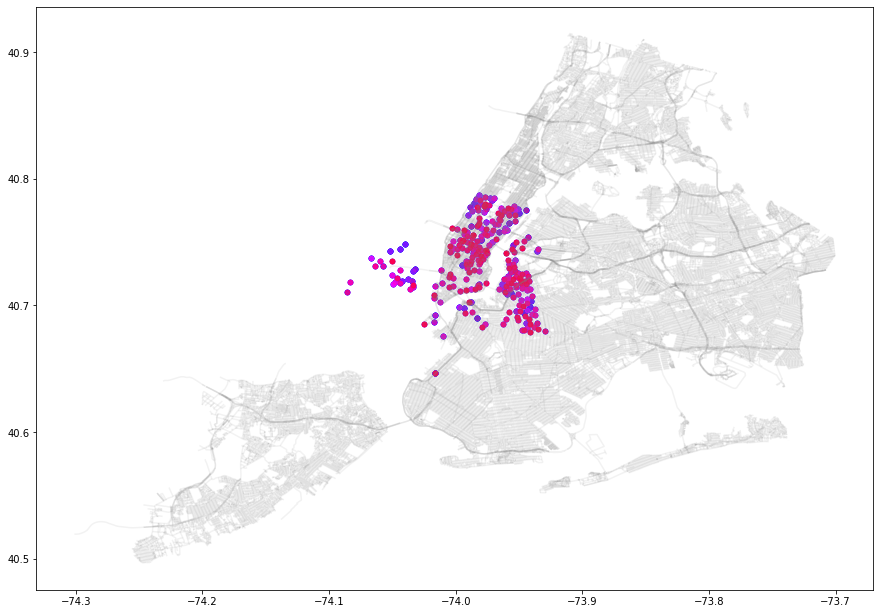

In [121]:
fig,ax = plt.subplots(figsize=(15,15))
street_mapr.plot(ax = ax, alpha=0.1, color = 'grey')
geo_df10.plot(ax = ax, markersize=20, color="#054cff", marker = 'o', alpha = 0.7)
geo_df9.plot(ax = ax, markersize=20, color='#4314ff', marker = 'o', alpha = 0.6)
geo_df8.plot(ax = ax, markersize=20, color='#5613ff', marker = 'o', alpha = 0.3)
geo_df7.plot(ax = ax, markersize=20, color='#7113ff', marker = 'o', alpha = 0.3)
geo_df6.plot(ax = ax, markersize=20, color='#911cff', marker = 'o', alpha = 0.3)
geo_df5.plot(ax = ax, markersize=20, color='#c916ff', marker = 'o', alpha = 0.2)
geo_df4.plot(ax = ax, markersize=20, color='#f706ff', marker = 'o', alpha = 0.2)
geo_df3.plot(ax = ax, markersize=20, color='#ff00bf', marker = 'o', alpha = 0.2)
geo_df2.plot(ax = ax, markersize=20, color='#ff0077', marker = 'o', alpha = 0.2)
geo_df1.plot(ax = ax, markersize=20, color='#ff0048', marker = 'o', alpha = 0.2)



In [4]:
df = pd.concat([df,pd.get_dummies(df['start_station_id'], prefix='station_id')],axis=1)
df = df.drop(columns=['start_station_id'])

In [5]:
df = pd.concat([df,pd.get_dummies(df['starthour'], prefix='hour')],axis=1)
df = df.drop(columns=['starthour'])

In [6]:
.quantile([.25, .5, .75])

,gender ratio,station_id_72.0,station_id_79.0,station_id_82.0,station_id_83.0,station_id_116.0,station_id_119.0,station_id_120.0,station_id_127.0,station_id_128.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,15.333333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.750000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.111111,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.714286,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.500000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.806452,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.701754,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2.913621,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.346341,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = df.dropna()

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['gender ratio']] = sc.fit_transform(df[['gender ratio']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
df

,gender ratio,station_id_72.0,station_id_79.0,station_id_82.0,station_id_83.0,station_id_116.0,station_id_119.0,station_id_120.0,station_id_127.0,station_id_128.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.125197,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.030199,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.016758,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.005302,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.077356,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.048652,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.030662,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.029803,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.023339,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.026888,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df.iloc[:, 1:]

In [11]:
y = df['gender ratio']

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8',
                          'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15',                   
                          'pc16', 'pc17', 'pc18', 'pc19', 'pc20'])

In [27]:
pca.explained_variance_ratio_.sum()

0.4578342585607566

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.kernel_ridge import KernelRidge
regk = KernelRidge().fit(X_train, y_train)
regk.score(X_test, y_test)

0.14572186804912246

In [30]:
regk = KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.001, kernel='laplacian',
            kernel_params=None).fit(X_train, y_train)
regk.score(X_test, y_test)

0.14323380102639371